### Import libraries and data 

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [4]:
# Load the data 
file_path = 'C:/Users/lourd/A6_Open Project/Data Sets/frpp_public_dataset_fy22_final_051012023.xlsx'


In [6]:
# Load the relevant columns
df_full = pd.read_excel(file_path, sheet_name='sheet1', usecols=[
    'Square Feet (Buildings)', 
    'Number of Federal Employees'
], nrows=10000)


In [8]:
df_full.shape

(10000, 2)

In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number of Federal Employees  9840 non-null   float64
 1   Square Feet (Buildings)      10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [12]:
# Calculate the utilization rate
df_full['Utilization Rate'] = df_full['Number of Federal Employees'] / df_full['Square Feet (Buildings)']


In [14]:
df_full.columns

Index(['Number of Federal Employees', 'Square Feet (Buildings)',
       'Utilization Rate'],
      dtype='object')

### Clean the Data  

In [17]:
# Drop any rows with missing values to ensure arrays are clean
df_full_cleaned = df_full.dropna(subset=['Square Feet (Buildings)', 'Utilization Rate'])

### Hypothesis:
#### Larger office buildings (in terms of square footage) tend to have lower utilization rates (measured by the number of federal employees per square foot) compared to smaller office buildings.

### Reshape Independent Variable and Assign Dependent Variable

In [21]:
# Independent variable (Square Footage)
X = df_full_cleaned['Square Feet (Buildings)'].values.reshape(-1, 1)

In [23]:
# Dependent variable (Utilization Rate)
y = df_full_cleaned['Utilization Rate'].values


### Split the data into training and test sets 

In [26]:
# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Create the linear regression model

In [29]:
model = LinearRegression()

In [31]:
# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test)


### Evaluate the model's performance

In [36]:
# MSE and R^2 calculations
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [38]:
# Print the model coefficients, MSE, and R² score
print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Model Coefficient (Slope): 9.176835434441965e-09
Model Intercept: 0.0003792253477681985
Mean Squared Error (MSE): 3.067668030735126e-06
R² Score: 0.0019938374417411975


Model Performance: The MSE (Mean Squared Error) is low, meaning the model's predictions are close to the actual values, so it's not making big errors. However, the R² score is nearly zero, indicating that the model doesn't explain much about how square footage affects utilization rate, suggesting other factors are likely more important in determining building usage.

### Plot the regression line along with the test data

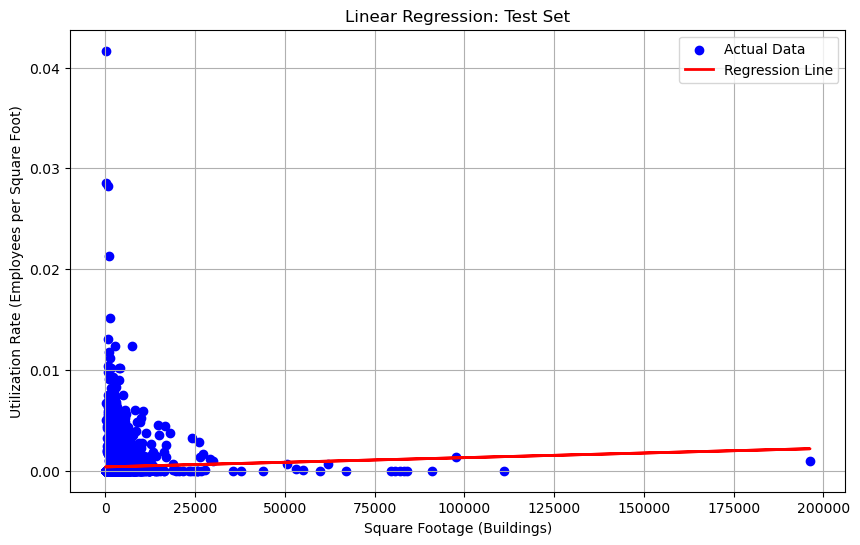

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Test Set')
plt.xlabel('Square Footage (Buildings)')
plt.ylabel('Utilization Rate (Employees per Square Foot)')
plt.legend()
plt.grid(True)
plt.show()


### Create a DataFrame to compare actual and predicted values

In [45]:
comparison_df = pd.DataFrame({
    'Actual Utilization Rate': y_test,
    'Predicted Utilization Rate': y_pred
})

# Display the first few rows of the comparison
print(comparison_df.head())


   Actual Utilization Rate  Predicted Utilization Rate
0                 0.000000                    0.000401
1                 0.000000                    0.000380
2                 0.000000                    0.000435
3                 0.000824                    0.000435
4                 0.000000                    0.000398


#### Observations and reflections

The model did not perform well on the test set, as shown by the scatter plot where the actual data points (blue dots) are mostly scattered far from the model's predictions (red line). This mismatch, especially for smaller square footages, reflects the low 
𝑅^2 score, indicating that the model fails to capture the true variations in utilization rates.

One possible reason for this poor performance is data bias. If the dataset is dominated by buildings with similar square footage or usage patterns, the model may become biased, leading to inaccurate predictions for buildings that don't fit this common pattern. This bias limits the model's ability to generalize and make accurate predictions across different types of buildings.

In terms of next steps, it might be worth considering exploring additional features (such as building type, location, or year built) or trying more complex models (e.g., polynomial regression, decision trees) to see if they can better capture the variability in the data. Or perhaps choose another hypothesis to test altogether. 
